<a href="https://colab.research.google.com/github/tiwarialka/Hurricane_Homework/blob/main/Alka_HurricaneClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Analyzing Hurricane Data with Python

Created by: Alka Tiwari, Amanda Pfeil, Arya Chavoshi, Dev Niyogi

Date: March 4, 2025

***Please copy this file in your google drive and work with the copied file***

## **Introduction**
Hurricanes are among the most powerful natural disasters, with devastating impacts on coastal regions. In this assignment, we will analyze hurricane data using **IBTrACS (International Best Track Archive for Climate Stewardship)** and **HURDAT2 (Hurricane Database 2)** datasets. We will use Python and relevant libraries to visualize hurricane tracks, examine landfalling storms, and analyze Hurricane Harvey (2017) in detail.

## **Learning Objectives**
By completing this assignment, students will:
1. Learn how to retrieve and process hurricane data.
2. Use Python libraries (Pandas, NumPy, Matplotlib, and Cartopy) for data visualization.
3. Analyze trends in hurricane landfalls.
4. Interpret scientific data to answer key questions about hurricanes.

---
## **Setup and Required Libraries**

We will use the following Python libraries:
- **pandas** for data handling
- **numpy** for numerical operations
- **matplotlib** for plotting
- **cartopy** for geographic visualizations

Run the following command to install any missing libraries:
```python
!pip install cartopy
```

---

---
## **Part 1: Loading and Filtering Hurricane Data**

### **Task 1: Download IBTrACS dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Download IBTrACS dataset
url = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.since1980.list.v04r00.csv"
df = pd.read_csv(url, skiprows=[1], low_memory=False)

# Filter data for years 2000-2023
df = df[(df['SEASON'] >= 2000) & (df['SEASON'] <= 2023)]


### **Task 2: Visualizing Hurricane Tracks**
We will plot hurricane tracks from 2000 to 2023 using **two different map projections**.


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWar

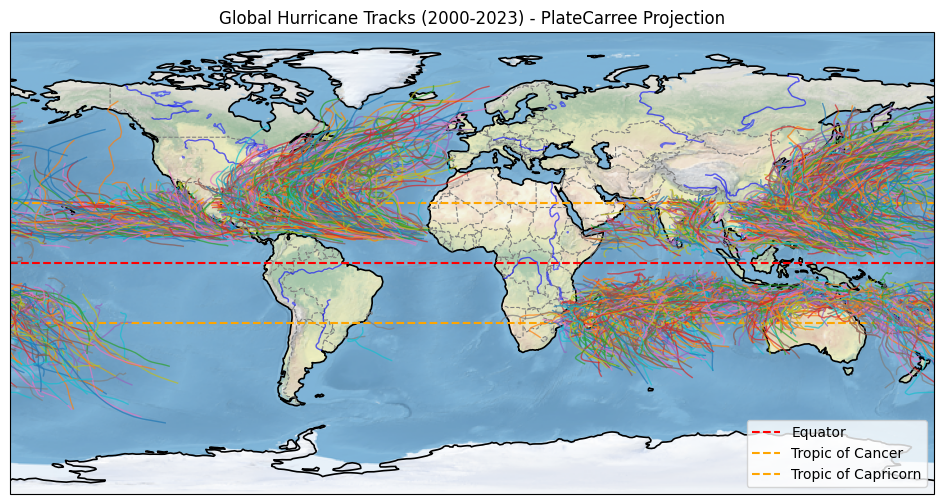

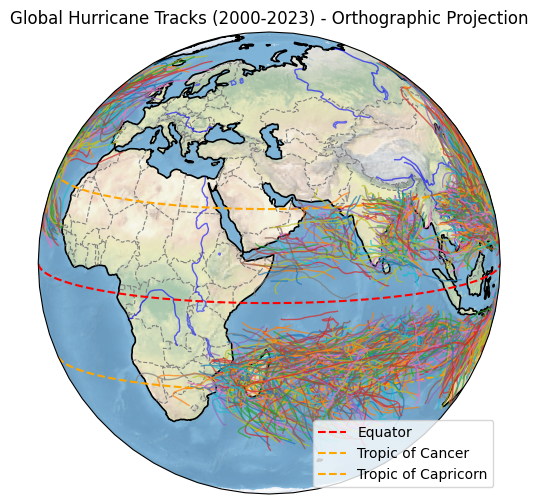

In [ ]:
def plot_hurricanes(df, projection='PlateCarree'):
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree() if projection == 'PlateCarree' else ccrs.Orthographic(central_longitude=50, central_latitude=10))

    ax.set_global()
    ax.stock_img()
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.LAND, facecolor='tan')
    ax.add_feature(cfeature.COASTLINE, linewidth=1.2, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='gray', linewidth=0.8)
    ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='lightblue', alpha=0.5)
    ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.6)

    # Add Equator and Tropics
    ax.plot(np.linspace(-180, 180, 100), np.full(100, 0), transform=ccrs.PlateCarree(), color='red', linestyle='--', linewidth=1.5, label='Equator')
    ax.plot(np.linspace(-180, 180, 100), np.full(100, 23.5), transform=ccrs.PlateCarree(), color='orange', linestyle='--', linewidth=1.5, label='Tropic of Cancer')
    ax.plot(np.linspace(-180, 180, 100), np.full(100, -23.5), transform=ccrs.PlateCarree(), color='orange', linestyle='--', linewidth=1.5, label='Tropic of Capricorn')
    ax.legend(loc='lower right')

    for _, track in df.groupby('SID'):
        plt.plot(track['LON'], track['LAT'], transform=ccrs.PlateCarree(), alpha=0.7, linewidth=1)

    plt.title(f'Global Hurricane Tracks (2000-2023) - {projection} Projection')
    plt.show()

# Generate both projections
plot_hurricanes(df, projection='PlateCarree')
plot_hurricanes(df, projection='Orthographic')




### **Discussion Questions:**
1. What differences do you observe between the two projections? Which one is more effective for analyzing hurricane tracks?
2. Based on the plots, where do hurricanes typically originate relative to the **equator and tropics**? Why?

---

## **Part 2: Analyzing Landfalling Hurricanes (2010-2024)**


In [ ]:
# Select relevant columns
keepCols = ['SID','SEASON', 'NAME', 'ISO_TIME', 'LAT', 'LON', 'USA_STATUS','USA_RECORD', 'USA_WIND', 'USA_PRES']
df_USA = pd.read_csv(url, low_memory=False, skiprows=[1], usecols=keepCols)

# Filter for landfalling storms (USA_RECORD = 'L')
df_landfall = df_USA[(df_USA['SEASON'] >= 2010) & (df_USA['SEASON'] <= 2024) & (df_USA['USA_RECORD'] == 'L')]

# Count unique hurricanes that made landfall
num_hurricanes = df_landfall['SID'].nunique()
print(f"Number of unique hurricanes that made landfall (2010-2024): {num_hurricanes}")


Number of unique hurricanes that made landfall (2010-2024): 150



### **Discussion Question:**
- How many hurricanes made landfall in the USA between **2010 and 2024**? Does this number align with your expectations?

---



## **Part 3: Case Study - Hurricane Harvey (2017)**

<ipython-input-26-038149ca33f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_harvey['USA_WIND'] = pd.to_numeric(df_harvey['USA_WIND'], errors='coerce')
<ipython-input-26-038149ca33f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_harvey['USA_PRES'] = pd.to_numeric(df_harvey['USA_PRES'], errors='coerce')
<ipython-input-26-038149ca33f5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

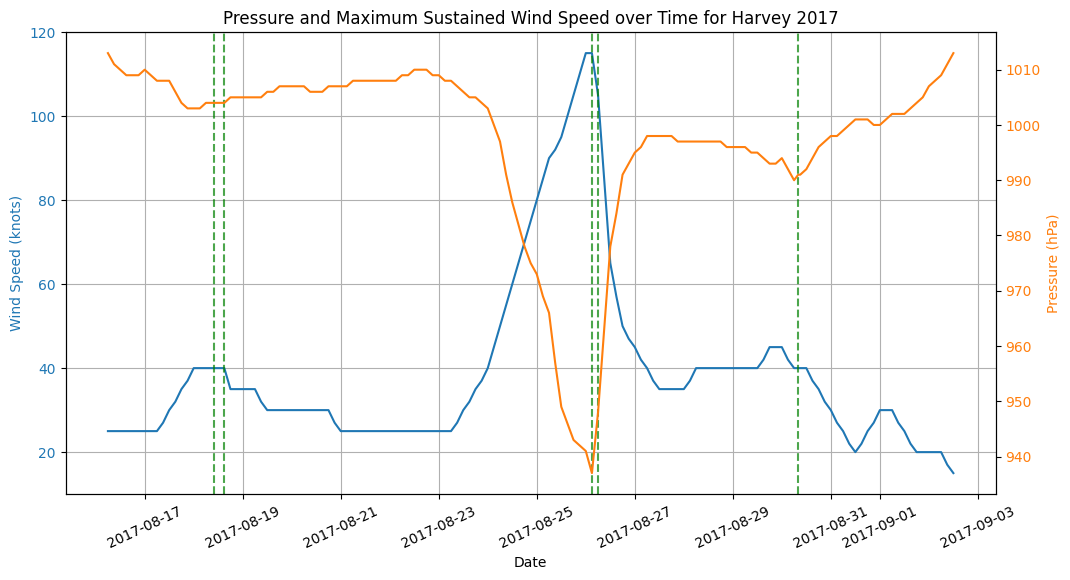

In [ ]:
# Select data for Hurricane Harvey
df_harvey = df_USA[(df_USA['NAME'] == 'HARVEY') & (df_USA['SEASON'] == 2017)]

# Formatting the data type of variables before plotting
df_harvey['USA_WIND'] = pd.to_numeric(df_harvey['USA_WIND'], errors='coerce')
df_harvey['USA_PRES'] = pd.to_numeric(df_harvey['USA_PRES'], errors='coerce')
# Convert to datetime format
df_harvey['ISO_TIME'] = pd.to_datetime(df_harvey['ISO_TIME'])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
# Rotate x-axis ticks for better readability
plt.xticks(rotation=25)

# Plot wind speed on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Wind Speed (knots)', color='tab:blue')
ax1.plot(df_harvey['ISO_TIME'], df_harvey['USA_WIND'], color='tab:blue', label='Wind Speed')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Rotating X-axis labels
#ax1.set_xticklabels(rotation = 45)

# Create a second y-axis for pressure
ax2 = ax1.twinx()
ax2.set_ylabel('Pressure (hPa)', color='tab:orange')
ax2.plot(df_harvey['ISO_TIME'], df_harvey['USA_PRES'], color='tab:orange', label='Pressure (hPa)')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add vertical lines where USA_RECORD is 'L'
landfall_times = df_harvey[df_harvey['USA_RECORD'] == 'L']['ISO_TIME']
for time in landfall_times:
    ax1.axvline(x=time, color='green', linestyle='--', alpha=0.7, label='Landfall' if 'Landfall' not in ax1.get_legend_handles_labels()[1] else "")

# Title and grid
plt.title('Pressure and Maximum Sustained Wind Speed over Time for Harvey 2017')

# Show the plot
plt.show()



### **Discussion Question:**
- What happens to the wind speed and pressure when Hurricane Harvey makes landfall? Explain your observations.
- What are the green dotted lines in the plot?

---
### Question:
- Draw a free hand structure of the hurricane representing each element.
- What is Saffir-Simpson Scale? Can there be a Category 6 hurricane?
- What is your favorite picture from ongoing Cyclone Andrew?
- Download GOES-16 imagery from the link below (any of your favorite) and describe your observation. https://satlib.cira.colostate.edu/event/hurricane-helene/

## **Submission**
Submit your Colab notebook with answers to discussion questions. Be sure to include your plots and interpretations.

**Due Date: [March 26, 2025]**